In [0]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [12]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.head(4)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."


In [17]:
df.shape

(28332, 24)

In [18]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [19]:
data = df[['reviews.rating', 'reviews.text', 'reviews.title']]
data.describe()


,reviews.rating
count,28332.000000
mean,4.514048
std,0.934957
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [20]:
data.shape

(28332, 3)

In [21]:
data.isnull().sum()

reviews.rating    0
reviews.text      0
reviews.title     0
dtype: int64

In [22]:
data.dropna(how='any')
data.shape

(28332, 3)

In [25]:
rating_stats = data['reviews.rating'].value_counts(sort=False)
rating_stats

1      965
2      616
3     1206
4     5648
5    19897
Name: reviews.rating, dtype: int64

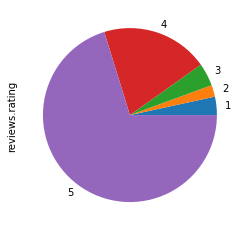

In [26]:
rating_stats.plot.pie()

In [27]:
data = data[data['reviews.rating'].notnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28332 entries, 0 to 28331
Data columns (total 3 columns):
reviews.rating    28332 non-null int64
reviews.text      28332 non-null object
reviews.title     28332 non-null object
dtypes: int64(1), object(2)
memory usage: 885.4+ KB


In [0]:
negative_words = pd.read_csv('negative-words.csv')
positive_words = pd.read_csv('positive-words.csv')

In [0]:
def sentiment(sentence):
  value = 0
  tokenized_sentence = word_tokenize(sentence)
  tokenized_words = [''.join(char for char in sentence if char not in string.punctuation) for sentence in tokenized_sentence]
  words = [word for word in tokenized_words if word not in stopwords.words('english')]
  for word in words:
    if word in negative_words:
      value -= 1
    elif word in positive_words:
      value += 1
    else:
      value += 0
  return value

In [0]:
positive_reviews = 0
neutral_reviews = 0
negative_reviews = 0

for review in data['reviews.text']:
  value = sentiment(review)
  if value > 0:
    positive_reviews += 1
  elif value < 0:
    negative_reviews += 1
  else:
    neutral_reviews +=1

([<matplotlib.patches.Wedge at 0x7fc6975b0828>,
 [Text(6.300000000000001, 0.0, 'Positive'),
  Text(-3.299989267574624, 0.008416287322846076, 'Neutral'),
  Text(3.2999892672483444, -0.008416415254617251, 'Negative')],
 [Text(4.8, 0.0, '0.0000%'),
  Text(-1.7999941459497943, 0.004590702176097859, '99.9188%'),
  Text(1.7999941457718238, -0.004590771957063954, '0.0812%')])

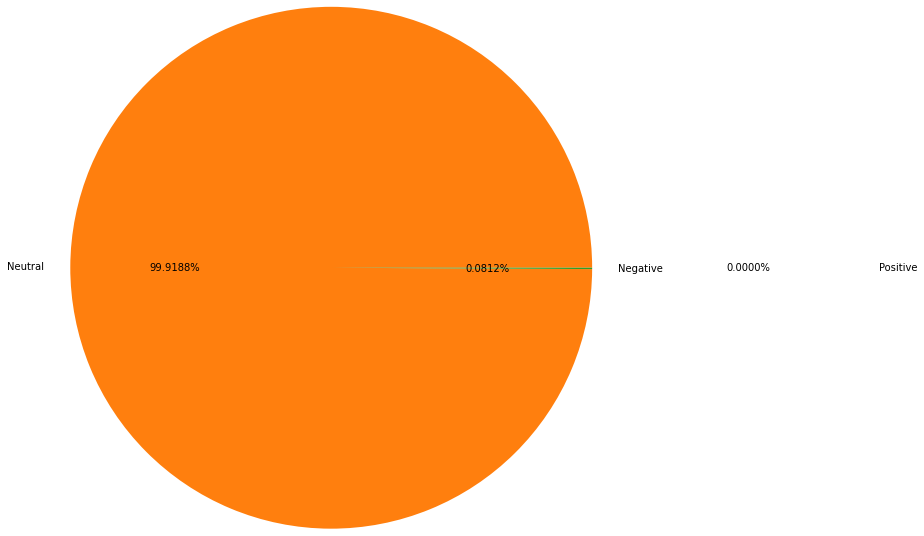

In [58]:
plt.pie([positive_reviews, neutral_reviews, negative_reviews], labels = ['Positive', 'Neutral', 'Negative'], explode=(3, 0, 0), autopct = '%4.4f%%', radius = 3)